# Final EDA — Full Labeled Dataset (1 179 Images)

> **Purpose:** Exploratory Data Analysis on the complete labeled dataset before modeling.  
> **Source:** `mini_labels.csv` + `pages_raw/`  
> **No ML training or dataset splitting is performed.**

In [1]:
import os, re, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

warnings.filterwarnings("ignore")
plt.rcParams.update({"figure.dpi": 120, "axes.titlesize": 13, "axes.labelsize": 11})

PAGES_DIR = "pages_raw"
CSV_PATH = "mini_labels.csv"

## Section 1 — Load Data

In [2]:
df = pd.read_csv(CSV_PATH)

print(f"Total labeled samples : {len(df)}")
print(f"Unique classes        : {df['label'].nunique()}")
print(f"Class names           : {df['label'].unique().tolist()}")
df.head()

Total labeled samples : 1179
Unique classes        : 5
Class names           : ['Other Pages', "Independent Auditor's Report", 'Financial Sheets', 'Notes (Text)', 'Notes (Tabular)']


,image_name,label
0,FS1_page_1.jpg,Other Pages
1,FS1_page_2.jpg,Other Pages
2,FS1_page_3.jpg,Independent Auditor's Report
3,FS1_page_4.jpg,Independent Auditor's Report
4,FS1_page_5.jpg,Independent Auditor's Report


## Section 2 — Class Distribution Analysis

In [3]:
counts = df["label"].value_counts()
pct = df["label"].value_counts(normalize=True).mul(100).round(2)

dist_table = pd.DataFrame({"Count": counts, "Percentage (%)": pct}).sort_values("Count", ascending=False)
dist_table.index.name = "Label"

imbalance_ratio = counts.max() / counts.min()
print(f"Imbalance ratio (largest / smallest): {imbalance_ratio:.2f}\n")
dist_table

Imbalance ratio (largest / smallest): 8.29



,Count,Percentage (%)
Label,,
Notes (Tabular),547,46.40
Notes (Text),330,27.99
Financial Sheets,125,10.60
Independent Auditor's Report,111,9.41
Other Pages,66,5.60


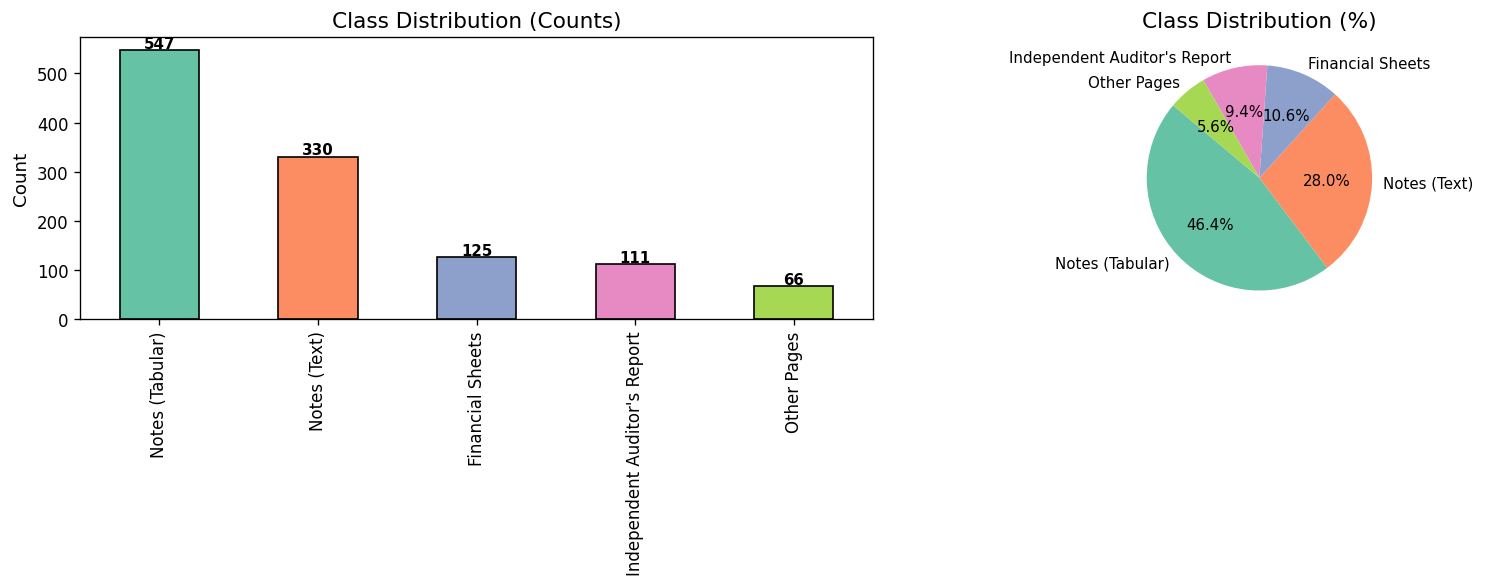

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = plt.cm.Set2.colors[:len(counts)]

counts.plot.bar(ax=axes[0], color=colors, edgecolor="black")
axes[0].set_title("Class Distribution (Counts)")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("")
for i, v in enumerate(counts.values):
    axes[0].text(i, v + 5, str(v), ha="center", fontsize=9, fontweight="bold")

pct.plot.pie(ax=axes[1], autopct="%1.1f%%", colors=colors, startangle=140, textprops={"fontsize": 9})
axes[1].set_ylabel("")
axes[1].set_title("Class Distribution (%)")

plt.tight_layout()
plt.savefig("class_distribution.png", bbox_inches="tight")
plt.show()

## Section 3 — PDF Distribution

In [5]:
df["pdf_prefix"] = df["image_name"].str.extract(r"^(.+?)_page_\d+")

pages_per_pdf = df["pdf_prefix"].value_counts().sort_values(ascending=False)
print(f"Total unique PDFs: {pages_per_pdf.shape[0]}\n")
print("Top 10 PDFs by page count:")
pages_per_pdf.head(10)

Total unique PDFs: 30

Top 10 PDFs by page count:


pdf_prefix
FS12    64
FS22    60
FS16    57
FS19    55
FS6     52
FS8     45
FS21    44
RSF8    42
FS2     41
FS14    40
Name: count, dtype: int64

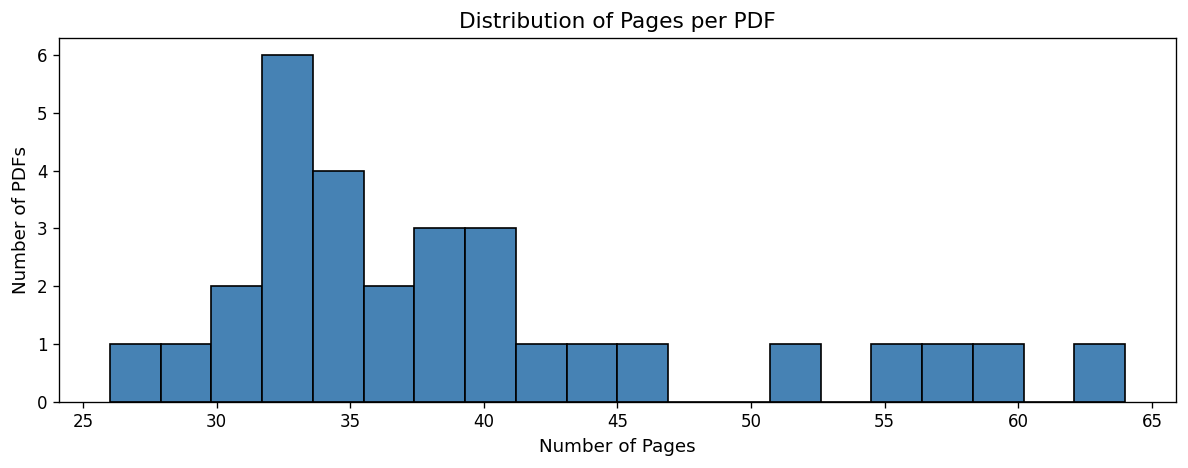

In [6]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(pages_per_pdf.values, bins=20, color="steelblue", edgecolor="black")
ax.set_title("Distribution of Pages per PDF")
ax.set_xlabel("Number of Pages")
ax.set_ylabel("Number of PDFs")
plt.tight_layout()
plt.savefig("pdf_page_distribution.png", bbox_inches="tight")
plt.show()

## Section 4 — Class vs PDF Cross Table

In [7]:
pivot = pd.crosstab(df["pdf_prefix"], df["label"])
pivot["Total"] = pivot.sum(axis=1)
pivot = pivot.sort_values("Total", ascending=False)

print(f"Cross table shape: {pivot.shape[0]} PDFs × {pivot.shape[1] - 1} classes\n")
pivot

Cross table shape: 30 PDFs × 5 classes



label,Financial Sheets,Independent Auditor's Report,Notes (Tabular),Notes (Text),Other Pages,Total
pdf_prefix,,,,,,
FS12,4,4,37,17,2,64
FS22,4,5,31,19,1,60
FS16,5,4,28,18,2,57
FS19,4,2,35,12,2,55
FS6,5,5,25,15,2,52
FS8,4,4,20,16,1,45
FS21,4,5,18,15,2,44
RSF8,4,4,17,12,5,42
FS2,4,4,20,11,2,41


In [8]:
all_labels = df["label"].unique()
missing_info = []
for pdf in pivot.index:
    missing = [lbl for lbl in all_labels if pivot.loc[pdf, lbl] == 0] if "Total" in pivot.columns else []
    missing_cols = [lbl for lbl in all_labels if lbl in pivot.columns and pivot.loc[pdf, lbl] == 0]
    if missing_cols:
        missing_info.append({"PDF": pdf, "Missing Classes": ", ".join(missing_cols)})

if missing_info:
    missing_df = pd.DataFrame(missing_info)
    print(f"PDFs with missing classes: {len(missing_df)}\n")
    display(missing_df)
else:
    print("All PDFs contain all classes.")

All PDFs contain all classes.


## Section 5 — Basic Image Statistics

In [9]:
stats = []
for _, row in tqdm(df.iterrows(), total=len(df), desc="Reading images"):
    path = os.path.join(PAGES_DIR, row["image_name"])
    try:
        img = Image.open(path).convert("L")  # grayscale for brightness
        arr = np.array(img, dtype=np.float32)
        w, h = img.size
        stats.append({
            "image_name": row["image_name"],
            "label": row["label"],
            "width": w,
            "height": h,
            "aspect_ratio": round(w / h, 4),
            "mean_brightness": round(arr.mean(), 2),
            "std_brightness": round(arr.std(), 2),
        })
    except Exception as e:
        print(f"  Error reading {row['image_name']}: {e}")

img_df = pd.DataFrame(stats)
print(f"Image stats collected for {len(img_df)} images.\n")
img_df[["width", "height", "aspect_ratio", "mean_brightness", "std_brightness"]].describe().round(2)

Reading images:   0%|          | 0/1179 [00:00<?, ?it/s]

Reading images:   0%|          | 4/1179 [00:00<00:30, 38.09it/s]

Reading images:   1%|          | 8/1179 [00:00<00:30, 37.88it/s]

Reading images:   1%|          | 12/1179 [00:00<00:31, 37.45it/s]

Reading images:   1%|▏         | 16/1179 [00:00<00:33, 34.32it/s]

Reading images:   2%|▏         | 20/1179 [00:00<00:33, 35.05it/s]

Reading images:   2%|▏         | 24/1179 [00:00<00:32, 35.72it/s]

Reading images:   2%|▏         | 28/1179 [00:00<00:31, 36.22it/s]

Reading images:   3%|▎         | 32/1179 [00:00<00:31, 36.67it/s]

Reading images:   3%|▎         | 36/1179 [00:00<00:30, 37.26it/s]

Reading images:   3%|▎         | 40/1179 [00:01<00:32, 35.34it/s]

Reading images:   4%|▎         | 44/1179 [00:01<00:32, 35.35it/s]

Reading images:   4%|▍         | 48/1179 [00:01<00:33, 33.90it/s]

Reading images:   4%|▍         | 52/1179 [00:01<00:34, 32.72it/s]

Reading images:   5%|▍         | 56/1179 [00:01<00:36, 30.81it/s]

Reading images:   5%|▌         | 60/1179 [00:01<00:36, 30.74it/s]

Reading images:   5%|▌         | 64/1179 [00:01<00:35, 31.67it/s]

Reading images:   6%|▌         | 68/1179 [00:01<00:33, 33.02it/s]

Reading images:   6%|▌         | 72/1179 [00:02<00:33, 33.53it/s]

Reading images:   6%|▋         | 76/1179 [00:02<00:32, 34.23it/s]

Reading images:   7%|▋         | 80/1179 [00:02<00:31, 34.64it/s]

Reading images:   7%|▋         | 84/1179 [00:02<00:32, 33.78it/s]

Reading images:   7%|▋         | 88/1179 [00:02<00:32, 33.59it/s]

Reading images:   8%|▊         | 92/1179 [00:02<00:32, 33.83it/s]

Reading images:   8%|▊         | 96/1179 [00:02<00:32, 33.59it/s]

Reading images:   8%|▊         | 100/1179 [00:02<00:31, 34.02it/s]

Reading images:   9%|▉         | 104/1179 [00:03<00:31, 34.44it/s]

Reading images:   9%|▉         | 108/1179 [00:03<00:30, 35.01it/s]

Reading images:   9%|▉         | 112/1179 [00:03<00:30, 35.30it/s]

Reading images:  10%|▉         | 116/1179 [00:03<00:30, 35.21it/s]

Reading images:  10%|█         | 120/1179 [00:03<00:31, 33.10it/s]

Reading images:  11%|█         | 124/1179 [00:03<00:30, 34.13it/s]

Reading images:  11%|█         | 128/1179 [00:03<00:29, 35.09it/s]

Reading images:  11%|█         | 132/1179 [00:03<00:30, 34.36it/s]

Reading images:  12%|█▏        | 136/1179 [00:03<00:29, 34.79it/s]

Reading images:  12%|█▏        | 140/1179 [00:04<00:29, 35.37it/s]

Reading images:  12%|█▏        | 144/1179 [00:04<00:29, 35.28it/s]

Reading images:  13%|█▎        | 148/1179 [00:04<00:28, 35.57it/s]

Reading images:  13%|█▎        | 152/1179 [00:04<00:29, 34.27it/s]

Reading images:  13%|█▎        | 156/1179 [00:04<00:30, 33.37it/s]

Reading images:  14%|█▎        | 160/1179 [00:04<00:29, 34.67it/s]

Reading images:  14%|█▍        | 164/1179 [00:04<00:28, 35.41it/s]

Reading images:  14%|█▍        | 168/1179 [00:04<00:28, 35.99it/s]

Reading images:  15%|█▍        | 172/1179 [00:04<00:27, 36.17it/s]

Reading images:  15%|█▍        | 176/1179 [00:05<00:27, 36.40it/s]

Reading images:  15%|█▌        | 180/1179 [00:05<00:27, 36.23it/s]

Reading images:  16%|█▌        | 184/1179 [00:05<00:27, 36.26it/s]

Reading images:  16%|█▌        | 188/1179 [00:05<00:28, 35.17it/s]

Reading images:  16%|█▋        | 192/1179 [00:05<00:28, 34.13it/s]

Reading images:  17%|█▋        | 196/1179 [00:05<00:28, 34.68it/s]

Reading images:  17%|█▋        | 200/1179 [00:05<00:28, 34.85it/s]

Reading images:  17%|█▋        | 204/1179 [00:05<00:27, 35.17it/s]

Reading images:  18%|█▊        | 208/1179 [00:05<00:27, 35.71it/s]

Reading images:  18%|█▊        | 212/1179 [00:06<00:26, 36.07it/s]

Reading images:  18%|█▊        | 216/1179 [00:06<00:26, 36.18it/s]

Reading images:  19%|█▊        | 220/1179 [00:06<00:26, 36.23it/s]

Reading images:  19%|█▉        | 224/1179 [00:06<00:27, 34.88it/s]

Reading images:  19%|█▉        | 228/1179 [00:06<00:27, 35.02it/s]

Reading images:  20%|█▉        | 232/1179 [00:06<00:26, 35.18it/s]

Reading images:  20%|██        | 236/1179 [00:06<00:26, 35.54it/s]

Reading images:  20%|██        | 240/1179 [00:06<00:26, 35.97it/s]

Reading images:  21%|██        | 244/1179 [00:06<00:25, 36.46it/s]

Reading images:  21%|██        | 248/1179 [00:07<00:25, 36.24it/s]

Reading images:  21%|██▏       | 252/1179 [00:07<00:25, 36.81it/s]

Reading images:  22%|██▏       | 256/1179 [00:07<00:25, 36.02it/s]

Reading images:  22%|██▏       | 260/1179 [00:07<00:26, 34.51it/s]

Reading images:  22%|██▏       | 264/1179 [00:07<00:26, 34.46it/s]

Reading images:  23%|██▎       | 268/1179 [00:07<00:26, 34.24it/s]

Reading images:  23%|██▎       | 272/1179 [00:07<00:26, 34.79it/s]

Reading images:  23%|██▎       | 276/1179 [00:07<00:25, 35.04it/s]

Reading images:  24%|██▎       | 280/1179 [00:08<00:25, 35.15it/s]

Reading images:  24%|██▍       | 284/1179 [00:08<00:25, 35.43it/s]

Reading images:  24%|██▍       | 288/1179 [00:08<00:24, 35.69it/s]

Reading images:  25%|██▍       | 292/1179 [00:08<00:25, 35.37it/s]

Reading images:  25%|██▌       | 296/1179 [00:08<00:25, 34.09it/s]

Reading images:  25%|██▌       | 300/1179 [00:08<00:25, 34.43it/s]

Reading images:  26%|██▌       | 304/1179 [00:08<00:24, 35.06it/s]

Reading images:  26%|██▌       | 308/1179 [00:08<00:24, 35.24it/s]

Reading images:  26%|██▋       | 312/1179 [00:08<00:24, 35.66it/s]

Reading images:  27%|██▋       | 316/1179 [00:09<00:23, 36.05it/s]

Reading images:  27%|██▋       | 320/1179 [00:09<00:23, 36.57it/s]

Reading images:  27%|██▋       | 324/1179 [00:09<00:23, 36.99it/s]

Reading images:  28%|██▊       | 328/1179 [00:09<00:23, 36.40it/s]

Reading images:  28%|██▊       | 332/1179 [00:09<00:24, 34.98it/s]

Reading images:  28%|██▊       | 336/1179 [00:09<00:23, 35.53it/s]

Reading images:  29%|██▉       | 340/1179 [00:09<00:24, 34.30it/s]

Reading images:  29%|██▉       | 344/1179 [00:09<00:23, 35.15it/s]

Reading images:  30%|██▉       | 348/1179 [00:09<00:23, 35.29it/s]

Reading images:  30%|██▉       | 352/1179 [00:10<00:23, 35.45it/s]

Reading images:  30%|███       | 356/1179 [00:10<00:23, 35.77it/s]

Reading images:  31%|███       | 360/1179 [00:10<00:22, 36.11it/s]

Reading images:  31%|███       | 364/1179 [00:10<00:22, 36.21it/s]

Reading images:  31%|███       | 368/1179 [00:10<00:23, 35.06it/s]

Reading images:  32%|███▏      | 372/1179 [00:10<00:22, 35.49it/s]

Reading images:  32%|███▏      | 376/1179 [00:10<00:22, 35.62it/s]

Reading images:  32%|███▏      | 380/1179 [00:10<00:22, 35.08it/s]

Reading images:  33%|███▎      | 384/1179 [00:10<00:22, 34.93it/s]

Reading images:  33%|███▎      | 388/1179 [00:11<00:22, 35.21it/s]

Reading images:  33%|███▎      | 392/1179 [00:11<00:22, 35.59it/s]

Reading images:  34%|███▎      | 396/1179 [00:11<00:21, 35.63it/s]

Reading images:  34%|███▍      | 400/1179 [00:11<00:21, 35.60it/s]

Reading images:  34%|███▍      | 404/1179 [00:11<00:22, 34.82it/s]

Reading images:  35%|███▍      | 408/1179 [00:11<00:21, 35.29it/s]

Reading images:  35%|███▍      | 412/1179 [00:11<00:21, 35.76it/s]

Reading images:  35%|███▌      | 416/1179 [00:11<00:21, 36.17it/s]

Reading images:  36%|███▌      | 420/1179 [00:11<00:20, 36.58it/s]

Reading images:  36%|███▌      | 424/1179 [00:12<00:20, 36.89it/s]

Reading images:  36%|███▋      | 428/1179 [00:12<00:20, 36.84it/s]

Reading images:  37%|███▋      | 432/1179 [00:12<00:20, 37.17it/s]

Reading images:  37%|███▋      | 436/1179 [00:12<00:20, 36.54it/s]

Reading images:  37%|███▋      | 440/1179 [00:12<00:20, 35.27it/s]

Reading images:  38%|███▊      | 444/1179 [00:12<00:20, 36.31it/s]

Reading images:  38%|███▊      | 448/1179 [00:12<00:19, 37.00it/s]

Reading images:  38%|███▊      | 452/1179 [00:12<00:19, 36.78it/s]

Reading images:  39%|███▊      | 456/1179 [00:12<00:19, 37.19it/s]

Reading images:  39%|███▉      | 460/1179 [00:13<00:19, 37.71it/s]

Reading images:  39%|███▉      | 464/1179 [00:13<00:18, 38.17it/s]

Reading images:  40%|███▉      | 468/1179 [00:13<00:18, 37.45it/s]

Reading images:  40%|████      | 472/1179 [00:13<00:19, 36.74it/s]

Reading images:  40%|████      | 476/1179 [00:13<00:19, 35.43it/s]

Reading images:  41%|████      | 480/1179 [00:13<00:19, 35.58it/s]

Reading images:  41%|████      | 484/1179 [00:13<00:19, 35.92it/s]

Reading images:  41%|████▏     | 488/1179 [00:13<00:18, 36.45it/s]

Reading images:  42%|████▏     | 492/1179 [00:13<00:18, 37.03it/s]

Reading images:  42%|████▏     | 496/1179 [00:14<00:18, 37.25it/s]

Reading images:  42%|████▏     | 500/1179 [00:14<00:18, 36.99it/s]

Reading images:  43%|████▎     | 504/1179 [00:14<00:18, 37.10it/s]

Reading images:  43%|████▎     | 508/1179 [00:14<00:18, 36.55it/s]

Reading images:  43%|████▎     | 512/1179 [00:14<00:19, 34.94it/s]

Reading images:  44%|████▍     | 516/1179 [00:14<00:18, 35.11it/s]

Reading images:  44%|████▍     | 520/1179 [00:14<00:18, 35.11it/s]

Reading images:  44%|████▍     | 524/1179 [00:14<00:18, 34.95it/s]

Reading images:  45%|████▍     | 528/1179 [00:14<00:18, 35.51it/s]

Reading images:  45%|████▌     | 532/1179 [00:15<00:18, 35.89it/s]

Reading images:  45%|████▌     | 536/1179 [00:15<00:17, 36.18it/s]

Reading images:  46%|████▌     | 540/1179 [00:15<00:17, 36.22it/s]

Reading images:  46%|████▌     | 544/1179 [00:15<00:17, 35.68it/s]

Reading images:  46%|████▋     | 548/1179 [00:15<00:18, 34.09it/s]

Reading images:  47%|████▋     | 552/1179 [00:15<00:18, 34.49it/s]

Reading images:  47%|████▋     | 556/1179 [00:15<00:17, 34.71it/s]

Reading images:  47%|████▋     | 560/1179 [00:15<00:17, 35.23it/s]

Reading images:  48%|████▊     | 564/1179 [00:15<00:17, 35.71it/s]

Reading images:  48%|████▊     | 568/1179 [00:16<00:16, 36.06it/s]

Reading images:  49%|████▊     | 572/1179 [00:16<00:16, 36.12it/s]

Reading images:  49%|████▉     | 576/1179 [00:16<00:16, 36.29it/s]

Reading images:  49%|████▉     | 580/1179 [00:16<00:17, 35.15it/s]

Reading images:  50%|████▉     | 584/1179 [00:16<00:17, 34.12it/s]

Reading images:  50%|████▉     | 588/1179 [00:16<00:17, 34.36it/s]

Reading images:  50%|█████     | 592/1179 [00:16<00:16, 34.95it/s]

Reading images:  51%|█████     | 596/1179 [00:16<00:16, 35.16it/s]

Reading images:  51%|█████     | 600/1179 [00:16<00:16, 35.32it/s]

Reading images:  51%|█████     | 604/1179 [00:17<00:16, 35.53it/s]

Reading images:  52%|█████▏    | 608/1179 [00:17<00:16, 35.28it/s]

Reading images:  52%|█████▏    | 612/1179 [00:17<00:15, 35.45it/s]

Reading images:  52%|█████▏    | 616/1179 [00:17<00:16, 34.54it/s]

Reading images:  53%|█████▎    | 620/1179 [00:17<00:16, 34.23it/s]

Reading images:  53%|█████▎    | 624/1179 [00:17<00:15, 34.99it/s]

Reading images:  53%|█████▎    | 628/1179 [00:17<00:15, 34.85it/s]

Reading images:  54%|█████▎    | 632/1179 [00:17<00:15, 35.62it/s]

Reading images:  54%|█████▍    | 636/1179 [00:17<00:15, 35.86it/s]

Reading images:  54%|█████▍    | 640/1179 [00:18<00:14, 36.73it/s]

Reading images:  55%|█████▍    | 644/1179 [00:18<00:14, 36.67it/s]

Reading images:  55%|█████▍    | 648/1179 [00:18<00:14, 36.49it/s]

Reading images:  55%|█████▌    | 652/1179 [00:18<00:14, 35.59it/s]

Reading images:  56%|█████▌    | 656/1179 [00:18<00:14, 35.38it/s]

Reading images:  56%|█████▌    | 660/1179 [00:18<00:14, 36.24it/s]

Reading images:  56%|█████▋    | 664/1179 [00:18<00:14, 36.18it/s]

Reading images:  57%|█████▋    | 668/1179 [00:18<00:14, 36.30it/s]

Reading images:  57%|█████▋    | 672/1179 [00:18<00:13, 36.45it/s]

Reading images:  57%|█████▋    | 676/1179 [00:19<00:13, 36.48it/s]

Reading images:  58%|█████▊    | 680/1179 [00:19<00:13, 36.18it/s]

Reading images:  58%|█████▊    | 684/1179 [00:19<00:13, 35.39it/s]

Reading images:  58%|█████▊    | 688/1179 [00:19<00:14, 34.63it/s]

Reading images:  59%|█████▊    | 692/1179 [00:19<00:14, 33.66it/s]

Reading images:  59%|█████▉    | 696/1179 [00:19<00:14, 33.79it/s]

Reading images:  59%|█████▉    | 700/1179 [00:19<00:14, 32.15it/s]

Reading images:  60%|█████▉    | 704/1179 [00:19<00:14, 33.92it/s]

Reading images:  60%|██████    | 708/1179 [00:20<00:13, 34.82it/s]

Reading images:  60%|██████    | 712/1179 [00:20<00:13, 35.06it/s]

Reading images:  61%|██████    | 716/1179 [00:20<00:13, 35.32it/s]

Reading images:  61%|██████    | 720/1179 [00:20<00:13, 35.02it/s]

Reading images:  61%|██████▏   | 724/1179 [00:20<00:13, 33.96it/s]

Reading images:  62%|██████▏   | 728/1179 [00:20<00:12, 35.27it/s]

Reading images:  62%|██████▏   | 732/1179 [00:20<00:12, 36.46it/s]

Reading images:  62%|██████▏   | 736/1179 [00:20<00:11, 37.17it/s]

Reading images:  63%|██████▎   | 740/1179 [00:20<00:11, 37.78it/s]

Reading images:  63%|██████▎   | 745/1179 [00:21<00:11, 38.40it/s]

Reading images:  64%|██████▎   | 749/1179 [00:21<00:11, 36.64it/s]

Reading images:  64%|██████▍   | 753/1179 [00:21<00:11, 36.65it/s]

Reading images:  64%|██████▍   | 757/1179 [00:21<00:11, 36.39it/s]

Reading images:  65%|██████▍   | 761/1179 [00:21<00:12, 33.85it/s]

Reading images:  65%|██████▍   | 765/1179 [00:21<00:12, 34.45it/s]

Reading images:  65%|██████▌   | 769/1179 [00:21<00:11, 34.92it/s]

Reading images:  66%|██████▌   | 773/1179 [00:21<00:11, 35.40it/s]

Reading images:  66%|██████▌   | 777/1179 [00:21<00:11, 35.96it/s]

Reading images:  66%|██████▌   | 781/1179 [00:22<00:10, 36.63it/s]

Reading images:  67%|██████▋   | 785/1179 [00:22<00:10, 37.09it/s]

Reading images:  67%|██████▋   | 789/1179 [00:22<00:10, 37.16it/s]

Reading images:  67%|██████▋   | 793/1179 [00:22<00:10, 36.65it/s]

Reading images:  68%|██████▊   | 797/1179 [00:22<00:10, 34.91it/s]

Reading images:  68%|██████▊   | 801/1179 [00:22<00:10, 34.67it/s]

Reading images:  68%|██████▊   | 805/1179 [00:22<00:11, 34.00it/s]

Reading images:  69%|██████▊   | 809/1179 [00:22<00:10, 34.10it/s]

Reading images:  69%|██████▉   | 813/1179 [00:22<00:10, 34.36it/s]

Reading images:  69%|██████▉   | 817/1179 [00:23<00:10, 34.60it/s]

Reading images:  70%|██████▉   | 821/1179 [00:23<00:10, 35.12it/s]

Reading images:  70%|██████▉   | 825/1179 [00:23<00:09, 35.83it/s]

Reading images:  70%|███████   | 829/1179 [00:23<00:10, 34.90it/s]

Reading images:  71%|███████   | 833/1179 [00:23<00:10, 34.22it/s]

Reading images:  71%|███████   | 837/1179 [00:23<00:09, 34.93it/s]

Reading images:  71%|███████▏  | 841/1179 [00:23<00:09, 35.84it/s]

Reading images:  72%|███████▏  | 845/1179 [00:23<00:09, 36.23it/s]

Reading images:  72%|███████▏  | 849/1179 [00:23<00:09, 36.28it/s]

Reading images:  72%|███████▏  | 853/1179 [00:24<00:09, 35.84it/s]

Reading images:  73%|███████▎  | 857/1179 [00:24<00:09, 33.92it/s]

Reading images:  73%|███████▎  | 861/1179 [00:24<00:09, 33.90it/s]

Reading images:  73%|███████▎  | 865/1179 [00:24<00:09, 32.67it/s]

Reading images:  74%|███████▎  | 869/1179 [00:24<00:09, 32.50it/s]

Reading images:  74%|███████▍  | 873/1179 [00:24<00:09, 33.29it/s]

Reading images:  74%|███████▍  | 877/1179 [00:24<00:08, 34.23it/s]

Reading images:  75%|███████▍  | 881/1179 [00:24<00:08, 34.87it/s]

Reading images:  75%|███████▌  | 885/1179 [00:25<00:08, 35.25it/s]

Reading images:  75%|███████▌  | 889/1179 [00:25<00:08, 34.99it/s]

Reading images:  76%|███████▌  | 893/1179 [00:25<00:08, 32.31it/s]

Reading images:  76%|███████▌  | 897/1179 [00:25<00:08, 31.61it/s]

Reading images:  76%|███████▋  | 901/1179 [00:25<00:08, 31.87it/s]

Reading images:  77%|███████▋  | 905/1179 [00:25<00:08, 33.11it/s]

Reading images:  77%|███████▋  | 909/1179 [00:25<00:08, 33.72it/s]

Reading images:  77%|███████▋  | 913/1179 [00:25<00:08, 32.90it/s]

Reading images:  78%|███████▊  | 917/1179 [00:26<00:08, 32.36it/s]

Reading images:  78%|███████▊  | 921/1179 [00:26<00:07, 32.51it/s]

Reading images:  78%|███████▊  | 925/1179 [00:26<00:07, 33.54it/s]

Reading images:  79%|███████▉  | 929/1179 [00:26<00:07, 32.53it/s]

Reading images:  79%|███████▉  | 933/1179 [00:26<00:07, 32.56it/s]

Reading images:  79%|███████▉  | 937/1179 [00:26<00:07, 33.61it/s]

Reading images:  80%|███████▉  | 941/1179 [00:26<00:06, 34.03it/s]

Reading images:  80%|████████  | 945/1179 [00:26<00:07, 32.19it/s]

Reading images:  80%|████████  | 949/1179 [00:27<00:07, 32.43it/s]

Reading images:  81%|████████  | 953/1179 [00:27<00:06, 32.88it/s]

Reading images:  81%|████████  | 957/1179 [00:27<00:06, 33.47it/s]

Reading images:  82%|████████▏ | 961/1179 [00:27<00:06, 33.63it/s]

Reading images:  82%|████████▏ | 965/1179 [00:27<00:06, 31.87it/s]

Reading images:  82%|████████▏ | 969/1179 [00:27<00:06, 33.04it/s]

Reading images:  83%|████████▎ | 973/1179 [00:27<00:06, 34.26it/s]

Reading images:  83%|████████▎ | 977/1179 [00:27<00:05, 34.60it/s]

Reading images:  83%|████████▎ | 981/1179 [00:27<00:05, 34.90it/s]

Reading images:  84%|████████▎ | 985/1179 [00:28<00:05, 34.78it/s]

Reading images:  84%|████████▍ | 989/1179 [00:28<00:05, 34.98it/s]

Reading images:  84%|████████▍ | 993/1179 [00:28<00:05, 35.37it/s]

Reading images:  85%|████████▍ | 997/1179 [00:28<00:05, 34.55it/s]

Reading images:  85%|████████▍ | 1001/1179 [00:28<00:05, 33.35it/s]

Reading images:  85%|████████▌ | 1005/1179 [00:28<00:05, 34.27it/s]

Reading images:  86%|████████▌ | 1009/1179 [00:28<00:04, 35.58it/s]

Reading images:  86%|████████▌ | 1013/1179 [00:28<00:04, 34.78it/s]

Reading images:  86%|████████▋ | 1017/1179 [00:28<00:04, 35.30it/s]

Reading images:  87%|████████▋ | 1021/1179 [00:29<00:04, 35.55it/s]

Reading images:  87%|████████▋ | 1025/1179 [00:29<00:04, 36.01it/s]

Reading images:  87%|████████▋ | 1029/1179 [00:29<00:04, 36.08it/s]

Reading images:  88%|████████▊ | 1033/1179 [00:29<00:04, 34.88it/s]

Reading images:  88%|████████▊ | 1037/1179 [00:29<00:04, 33.93it/s]

Reading images:  88%|████████▊ | 1041/1179 [00:29<00:03, 35.02it/s]

Reading images:  89%|████████▊ | 1045/1179 [00:29<00:03, 35.17it/s]

Reading images:  89%|████████▉ | 1049/1179 [00:29<00:03, 32.61it/s]

Reading images:  89%|████████▉ | 1053/1179 [00:30<00:03, 32.78it/s]

Reading images:  90%|████████▉ | 1057/1179 [00:30<00:03, 33.78it/s]

Reading images:  90%|████████▉ | 1061/1179 [00:30<00:03, 34.59it/s]

Reading images:  90%|█████████ | 1065/1179 [00:30<00:03, 33.95it/s]

Reading images:  91%|█████████ | 1069/1179 [00:30<00:03, 32.51it/s]

Reading images:  91%|█████████ | 1073/1179 [00:30<00:03, 32.86it/s]

Reading images:  91%|█████████▏| 1077/1179 [00:30<00:02, 34.05it/s]

Reading images:  92%|█████████▏| 1081/1179 [00:30<00:02, 34.65it/s]

Reading images:  92%|█████████▏| 1085/1179 [00:30<00:02, 34.81it/s]

Reading images:  92%|█████████▏| 1089/1179 [00:31<00:02, 35.45it/s]

Reading images:  93%|█████████▎| 1093/1179 [00:31<00:02, 35.84it/s]

Reading images:  93%|█████████▎| 1097/1179 [00:31<00:02, 35.86it/s]

Reading images:  93%|█████████▎| 1101/1179 [00:31<00:02, 26.74it/s]

Reading images:  94%|█████████▎| 1105/1179 [00:31<00:02, 28.86it/s]

Reading images:  94%|█████████▍| 1109/1179 [00:31<00:02, 31.47it/s]

Reading images:  94%|█████████▍| 1113/1179 [00:31<00:02, 32.38it/s]

Reading images:  95%|█████████▍| 1117/1179 [00:31<00:01, 33.71it/s]

Reading images:  95%|█████████▌| 1121/1179 [00:32<00:01, 34.00it/s]

Reading images:  95%|█████████▌| 1125/1179 [00:32<00:01, 34.42it/s]

Reading images:  96%|█████████▌| 1129/1179 [00:32<00:01, 35.37it/s]

Reading images:  96%|█████████▌| 1133/1179 [00:32<00:01, 35.63it/s]

Reading images:  96%|█████████▋| 1137/1179 [00:32<00:01, 34.62it/s]

Reading images:  97%|█████████▋| 1141/1179 [00:32<00:01, 34.97it/s]

Reading images:  97%|█████████▋| 1145/1179 [00:32<00:00, 35.76it/s]

Reading images:  97%|█████████▋| 1149/1179 [00:32<00:00, 36.17it/s]

Reading images:  98%|█████████▊| 1153/1179 [00:32<00:00, 36.71it/s]

Reading images:  98%|█████████▊| 1157/1179 [00:33<00:00, 37.33it/s]

Reading images:  98%|█████████▊| 1161/1179 [00:33<00:00, 37.77it/s]

Reading images:  99%|█████████▉| 1165/1179 [00:33<00:00, 38.30it/s]

Reading images:  99%|█████████▉| 1169/1179 [00:33<00:00, 38.16it/s]

Reading images:  99%|█████████▉| 1173/1179 [00:33<00:00, 36.95it/s]

Reading images: 100%|█████████▉| 1177/1179 [00:33<00:00, 36.95it/s]

Reading images: 100%|██████████| 1179/1179 [00:33<00:00, 35.01it/s]

Image stats collected for 1179 images.



,width,height,aspect_ratio,mean_brightness,std_brightness
count,1179.00,1179.00,1179.00,1179.00,1179.00
mean,1702.27,2255.75,0.76,246.71,36.42
std,163.43,147.88,0.13,7.73,8.82
min,1649.00,1651.00,0.70,85.09,8.46
25%,1654.00,2200.00,0.71,244.99,31.68
50%,1654.00,2338.00,0.71,247.25,36.80
75%,1700.00,2339.00,0.77,249.17,41.99
max,5334.00,3750.00,1.42,254.65,72.77


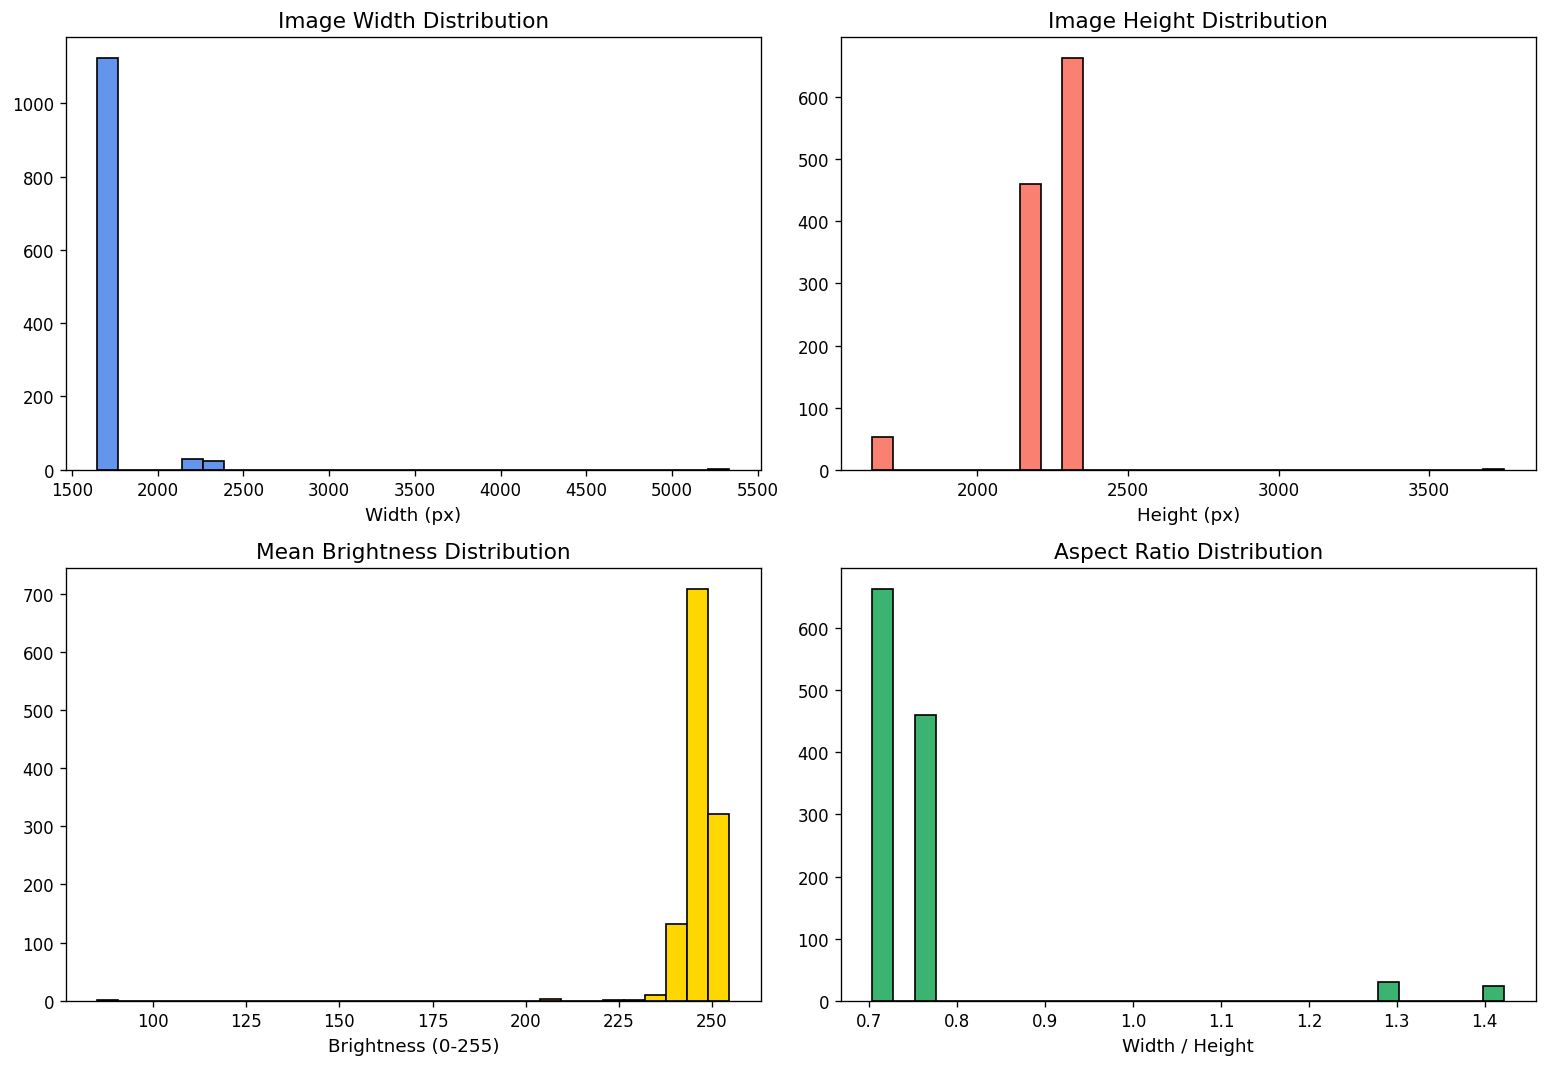

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(13, 9))

axes[0, 0].hist(img_df["width"], bins=30, color="cornflowerblue", edgecolor="black")
axes[0, 0].set_title("Image Width Distribution")
axes[0, 0].set_xlabel("Width (px)")

axes[0, 1].hist(img_df["height"], bins=30, color="salmon", edgecolor="black")
axes[0, 1].set_title("Image Height Distribution")
axes[0, 1].set_xlabel("Height (px)")

axes[1, 0].hist(img_df["mean_brightness"], bins=30, color="gold", edgecolor="black")
axes[1, 0].set_title("Mean Brightness Distribution")
axes[1, 0].set_xlabel("Brightness (0-255)")

axes[1, 1].hist(img_df["aspect_ratio"], bins=30, color="mediumseagreen", edgecolor="black")
axes[1, 1].set_title("Aspect Ratio Distribution")
axes[1, 1].set_xlabel("Width / Height")

plt.tight_layout()
plt.savefig("image_stats_histograms.png", bbox_inches="tight")
plt.show()

## Section 6 — Per-Class Image Statistics

In [11]:
per_class = img_df.groupby("label")[["mean_brightness", "std_brightness", "width", "height"]].mean().round(2)
per_class.index.name = "Label"
per_class

,mean_brightness,std_brightness,width,height
Label,,,,
Financial Sheets,248.399994,31.410000,1727.00,2233.43
Independent Auditor's Report,243.660004,41.410000,1661.29,2316.05
Notes (Tabular),247.910004,35.610001,1717.93,2229.92
Notes (Text),245.220001,41.490002,1673.57,2278.93
Other Pages,246.259995,18.850000,1738.08,2294.73


## Section 7 — Outlier Detection

In [12]:
area = img_df["width"] * img_df["height"]
q1_area, q3_area = area.quantile(0.25), area.quantile(0.75)
iqr_area = q3_area - q1_area
small_thresh = q1_area - 1.5 * iqr_area
large_thresh = q3_area + 1.5 * iqr_area

extremely_small = (area < small_thresh).sum()
extremely_large = (area > large_thresh).sum()

q1_br, q3_br = img_df["mean_brightness"].quantile(0.25), img_df["mean_brightness"].quantile(0.75)
iqr_br = q3_br - q1_br
bright_low = q1_br - 1.5 * iqr_br
bright_high = q3_br + 1.5 * iqr_br

extreme_dark = (img_df["mean_brightness"] < bright_low).sum()
extreme_bright = (img_df["mean_brightness"] > bright_high).sum()

print("Outlier Summary (IQR method)")
print("=" * 40)
print(f"Extremely small images : {extremely_small}")
print(f"Extremely large images : {extremely_large}")
print(f"Extreme dark images    : {extreme_dark}")
print(f"Extreme bright images  : {extreme_bright}")
print("=" * 40)
print(f"Total outliers         : {extremely_small + extremely_large + extreme_dark + extreme_bright}")

Outlier Summary (IQR method)
Extremely small images : 0
Extremely large images : 1
Extreme dark images    : 18
Extreme bright images  : 0
Total outliers         : 19


## Section 8 — Final Summary

In [13]:
from IPython.display import Markdown

severe = imbalance_ratio > 10
size_std_w = img_df["width"].std()
size_std_h = img_df["height"].std()
consistent = size_std_w < 50 and size_std_h < 50
total_outliers = extremely_small + extremely_large + extreme_dark + extreme_bright
anomalies = total_outliers > 0

summary_md = f"""
### Dataset Overview

| Metric | Value |
|---|---|
| Total images | {len(df)} |
| Unique classes | {df['label'].nunique()} |
| Unique PDFs | {df['pdf_prefix'].nunique()} |
| Imbalance ratio | {imbalance_ratio:.2f} |

### Class Balance Assessment

{"**Severe class imbalance detected.** The largest class is " + f"{imbalance_ratio:.1f}x" + " the smallest. Consider oversampling / augmentation." if severe else "Class imbalance is **moderate** (ratio " + f"{imbalance_ratio:.2f}" + "). Standard stratified splitting should suffice."}

### Image Size Consistency

{"Images are **highly consistent** in size (std width=" + f"{size_std_w:.1f}" + ", std height=" + f"{size_std_h:.1f}" + ")." if consistent else "Images show **some variation** in size (std width=" + f"{size_std_w:.1f}" + ", std height=" + f"{size_std_h:.1f}" + "). Resizing to a uniform dimension is recommended."}

### Anomalies

{"**No outlier images detected.** The dataset is clean." if not anomalies else f"**{total_outliers} outlier images detected** (small: {extremely_small}, large: {extremely_large}, dark: {extreme_dark}, bright: {extreme_bright}). Review before training."}

### ML Readiness

{"The dataset is **ready for modeling** after standard preprocessing (resize, normalize)." if not severe else "The dataset **requires balancing** before modeling. Use class weights, oversampling, or augmentation."}
"""

Markdown(summary_md)


### Dataset Overview

| Metric | Value |
|---|---|
| Total images | 1179 |
| Unique classes | 5 |
| Unique PDFs | 30 |
| Imbalance ratio | 8.29 |

### Class Balance Assessment

Class imbalance is **moderate** (ratio 8.29). Standard stratified splitting should suffice.

### Image Size Consistency

Images show **some variation** in size (std width=163.4, std height=147.9). Resizing to a uniform dimension is recommended.

### Anomalies

**19 outlier images detected** (small: 0, large: 1, dark: 18, bright: 0). Review before training.

### ML Readiness

The dataset is **ready for modeling** after standard preprocessing (resize, normalize).


In [14]:
print("Notebook execution complete.")

Notebook execution complete.


---

## Section 9 — Visual Outlier Inspection

> Re-detect outliers using the same IQR method and display them.  
> **Inspection only — no files are modified or deleted.**

In [15]:
area = img_df["width"] * img_df["height"]
q1_a, q3_a = area.quantile(0.25), area.quantile(0.75)
iqr_a = q3_a - q1_a

q1_b, q3_b = img_df["mean_brightness"].quantile(0.25), img_df["mean_brightness"].quantile(0.75)
iqr_b = q3_b - q1_b

mask_large = area > q3_a + 1.5 * iqr_a
mask_dark = img_df["mean_brightness"] < q1_b - 1.5 * iqr_b

outliers = img_df[mask_large | mask_dark].copy()
outliers["reason"] = ""
outliers.loc[mask_large[mask_large].index, "reason"] += "large "
outliers.loc[mask_dark[mask_dark].index, "reason"] += "dark"
outliers["reason"] = outliers["reason"].str.strip()

print(f"Total outliers detected: {len(outliers)}")
print(f"  - Extremely large : {mask_large.sum()}")
print(f"  - Extremely dark  : {mask_dark.sum()}")
print()

for _, row in outliers.iterrows():
    print(f"  {row['image_name']:30s}  label={row['label']:35s}  reason={row['reason']}")

Total outliers detected: 19
  - Extremely large : 1
  - Extremely dark  : 18

  FS2_page_3.jpg                  label=Independent Auditor's Report         reason=dark
  FS2_page_5.jpg                  label=Independent Auditor's Report         reason=dark
  FS6_page_4.jpg                  label=Independent Auditor's Report         reason=dark
  FS8_page_2.jpg                  label=Independent Auditor's Report         reason=dark
  FS8_page_3.jpg                  label=Independent Auditor's Report         reason=dark
  FS8_page_4.jpg                  label=Independent Auditor's Report         reason=dark
  FS9_page_29.jpg                 label=Notes (Text)                         reason=dark
  FS12_page_3.jpg                 label=Independent Auditor's Report         reason=dark
  FS12_page_5.jpg                 label=Independent Auditor's Report         reason=dark
  FS15_page_11.jpg                label=Notes (Text)                         reason=dark
  FS20_page_3.jpg               

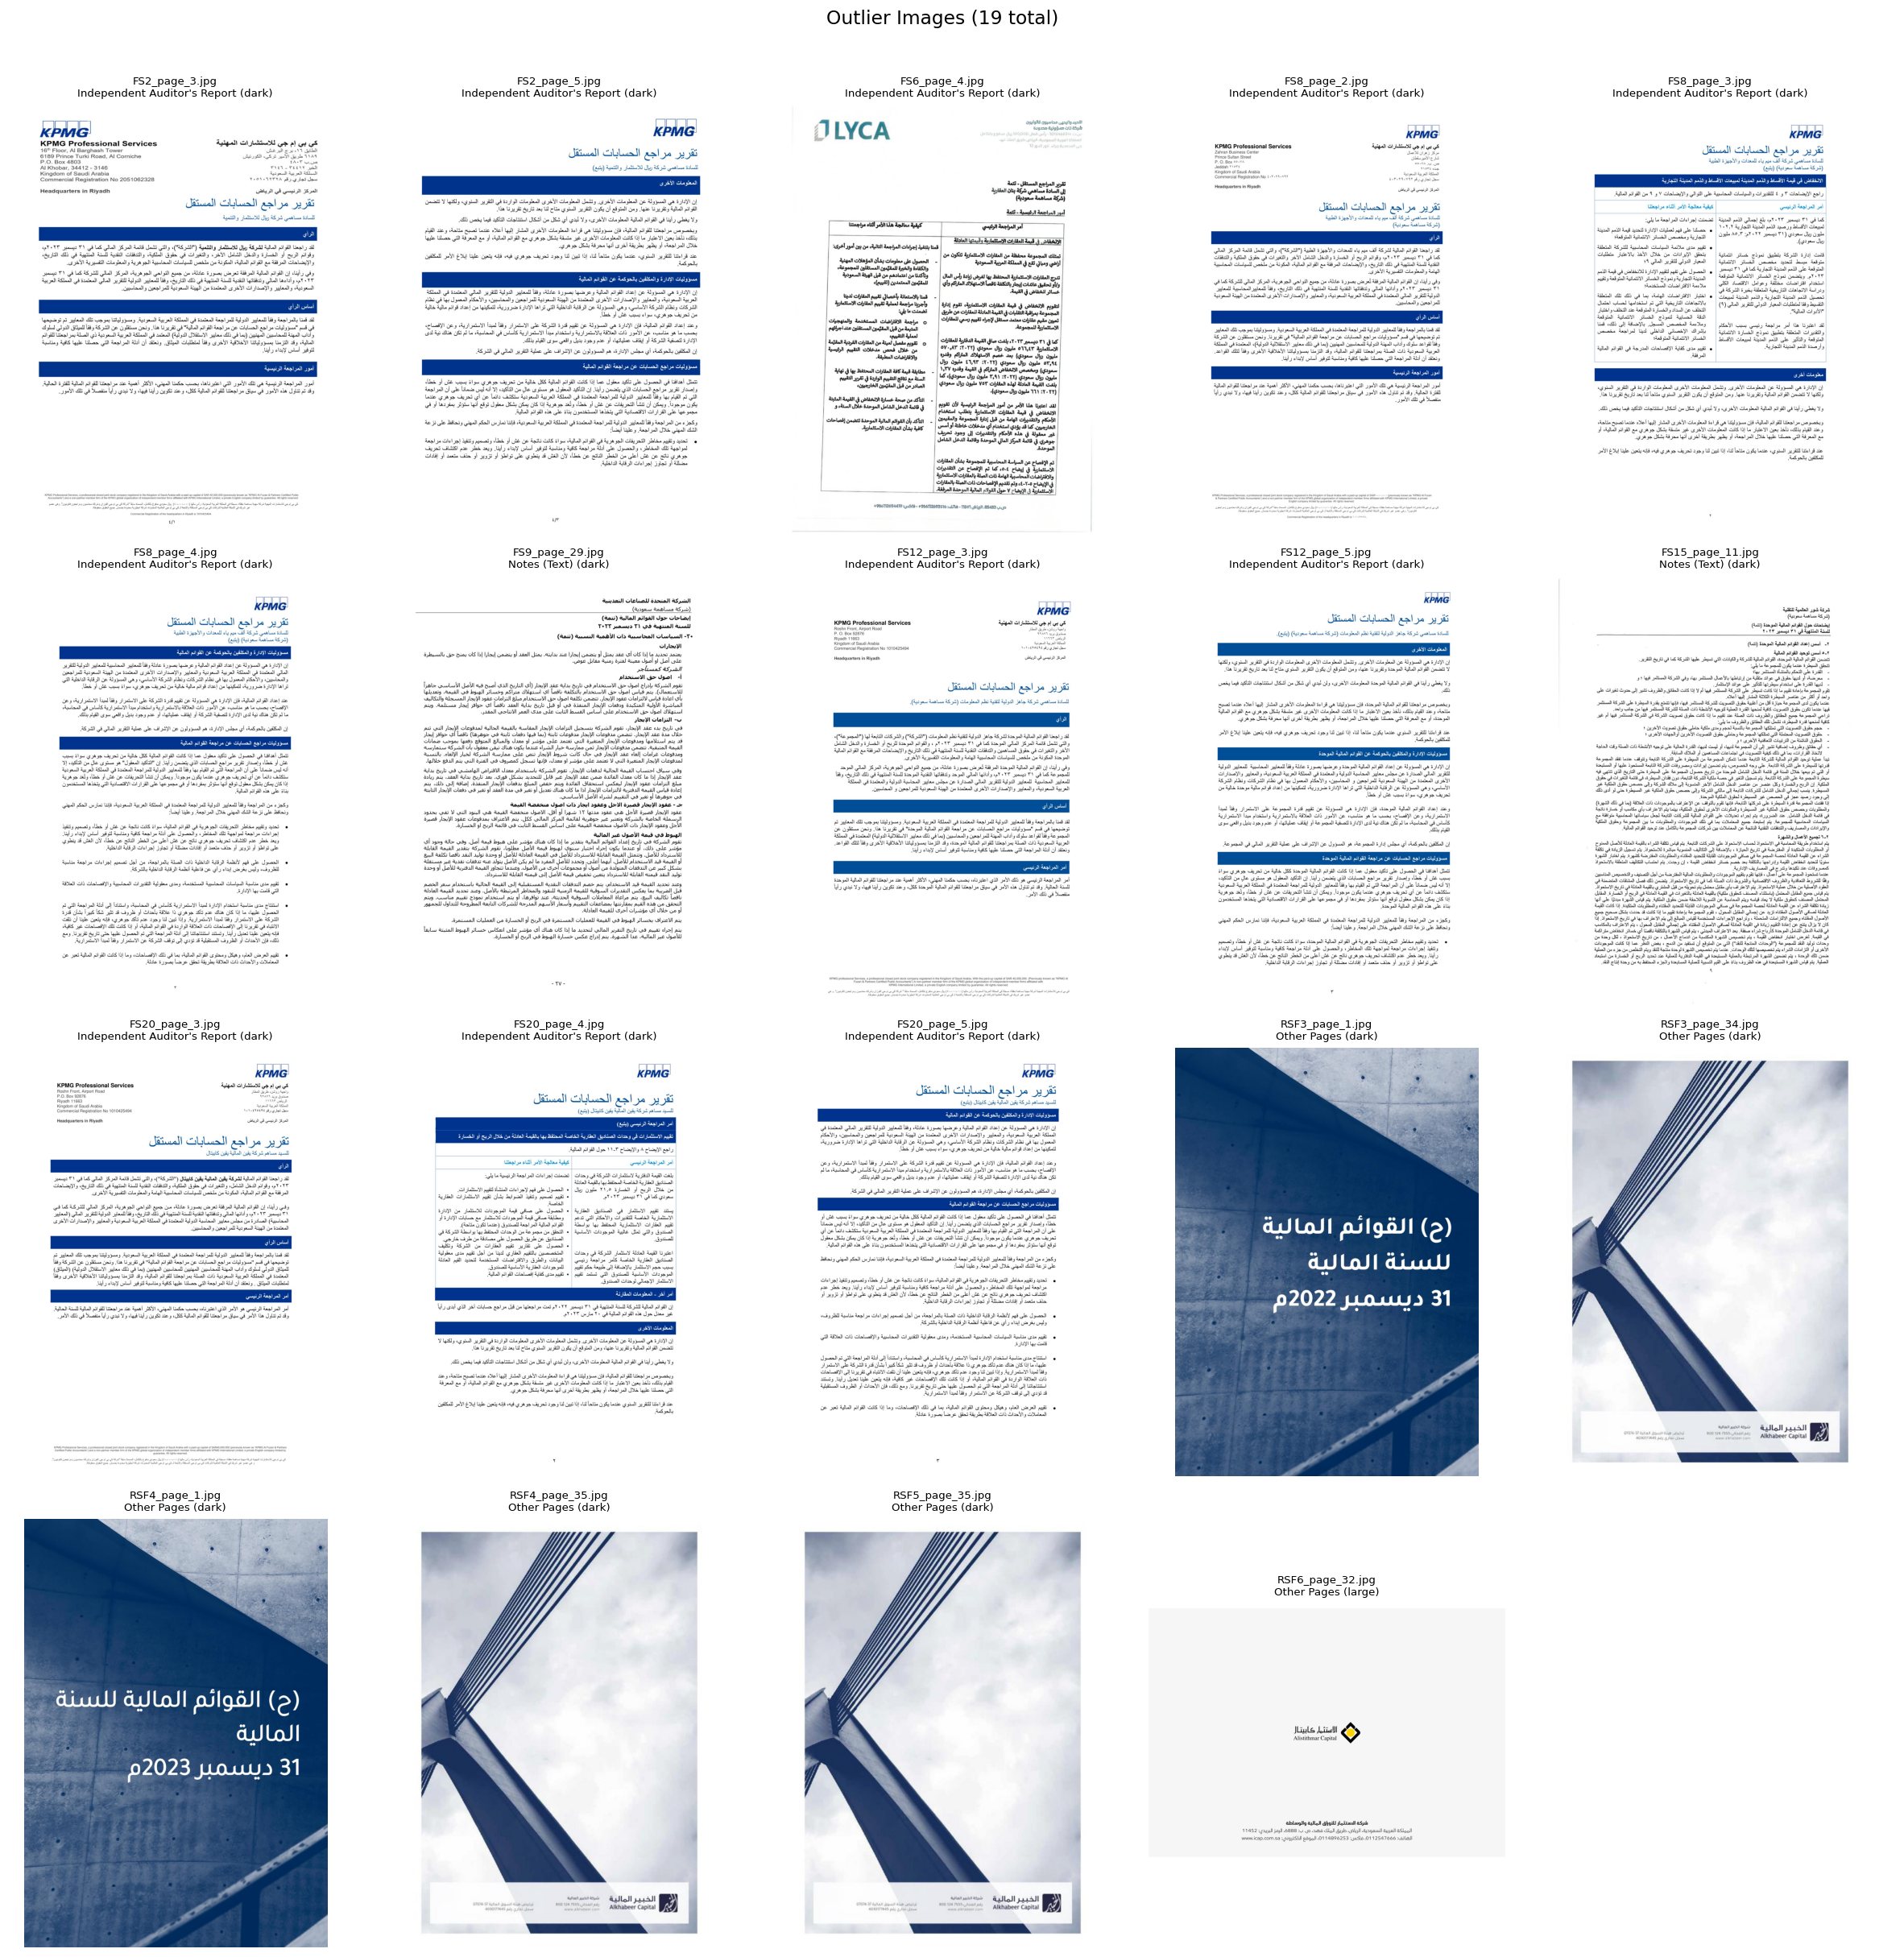

In [16]:
n = len(outliers)
cols = 5
rows = (n + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 5 * rows))
axes = axes.flatten() if n > 1 else [axes]

for i, (_, row) in enumerate(outliers.iterrows()):
    img = Image.open(os.path.join(PAGES_DIR, row["image_name"]))
    axes[i].imshow(img)
    axes[i].set_title(f"{row['image_name']}\n{row['label']} ({row['reason']})", fontsize=8)
    axes[i].axis("off")

for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.suptitle(f"Outlier Images ({n} total)", fontsize=14, y=1.01)
plt.tight_layout()
plt.show()